importing python libraries for data cleaning

In [1]:
import pandas as pd

In [2]:
import numpy as np

Let's load the Dataset

In [3]:
movies = pd.read_csv("IMDB_Movies.csv")

Let us look at the Columns and Data Type.

In [4]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
print(movies.dtypes)

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews          object
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [6]:
summary = movies.describe
print(summary)

<bound method NDFrame.describe of       color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   

In [7]:
movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

We can see a lot of null-values and also some columns which won't be useful for use. Let's drop those columns and remove the null-values.

In [8]:
movies.drop(['aspect_ratio','movie_imdb_link','actor_3_name', 'actor_3_facebook_likes', 'actor_2_name', 'actor_2_facebook_likes', 'color', 'facenumber_in_poster', 'director_facebook_likes'], axis=1, inplace=True)

In [9]:
movies['num_critic_for_reviews'].unique()

array([723., 302., 602., 813.,  nan, 462., 392., 324., 635., 375., 673.,
       434., 403., 313., 450., 733., 258., 703., 448., 451., 422., 599.,
       343., 509., 251., 446., 315., 516., 377., 644., 750., 300., 608.,
       334., 376., 366., 378., 525., 495., 469., 304., 436., 453., 424.,
       654., 539., 590., 338., 490., 306., 575., 428., 470., 298., 488.,
       322., 421., 162., 367., 240., 384., 248., 284., 396., 645., 408.,
       219., 486., 682.,  85., 264., 418., 186., 585.,  91., 250., 536.,
       370., 416., 401., 521.,  10., 218., 576., 226., 443., 188., 286.,
       288., 280., 653., 712., 642.,   1., 187., 362., 500., 389., 235.,
       231., 227., 275., 474., 228., 191., 329., 295., 318., 323., 276.,
       478., 167., 185., 350., 245., 406., 739., 225., 145., 310., 526.,
       465., 357., 194., 339., 132., 135., 256., 196., 220., 211., 464.,
       208., 287., 210., 432., 190., 314., 518., 291., 292., 184., 141.,
       267., 351., 163., 166., 510., 197., 244., 15

gross
budget
num_voted_users
imbd rating
director_name
plot_keywords
actor_1_name 
num_critic_for_reviews 
num_users_for_review
genres 
language
country
content_rating
budget 
title_year

aspect_ratio
movie_imdb_link
actor_3_name
actor_3_facebook_likes        
actor_2_name
actor_2_facebook_likes

In [10]:
movies.isnull().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
plot_keywords                153
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [11]:
movies.dropna(subset=['director_name'], inplace=True)

In [12]:
movies.dropna(subset=['title_year'], inplace=True)

In [13]:
movies.content_rating.unique()

array(['PG-13', 'PG', 'G', 'R', nan, 'TV-14', 'Not Rated', 'Unrated',
       'Approved', 'NC-17', 'X', 'GP', 'Passed', 'M', 'TV-G', 'TV-PG'],
      dtype=object)

Since content_rating has few null records left whcih can be replaced using mode value treatment.

In [14]:
movies["content_rating"].mode()

0    R
Name: content_rating, dtype: object

In [15]:
movies["content_rating"] = movies["content_rating"].fillna("R") 

In [16]:
print(movies["content_rating"])

0           PG-13
1           PG-13
2           PG-13
3           PG-13
5           PG-13
          ...    
5037    Not Rated
5038            R
5040            R
5041        PG-13
5042           PG
Name: content_rating, Length: 4935, dtype: object


Since duration has few null records left whcih can be replaced using mean value treatment.

In [18]:
movies["duration"].mean()

108.16737761527524

In [19]:
movies["duration"] = movies["duration"].fillna(108.16737761527524) 

In [20]:
print(movies["duration"])

0       178.0
1       169.0
2       148.0
3       164.0
5       132.0
        ...  
5037     95.0
5038     87.0
5040     76.0
5041    100.0
5042     90.0
Name: duration, Length: 4935, dtype: float64


In [21]:
movies.isnull().sum()

director_name                  0
num_critic_for_reviews        41
duration                       0
actor_1_facebook_likes         7
gross                        779
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
plot_keywords                140
num_user_for_reviews          15
language                       9
country                        1
content_rating                 0
budget                       392
title_year                     0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

We can see language column has null-values. To remove those we will be using 

Creating bool series True for NaN values and displaying data only with language = NaN 

In [28]:
bool_series = pd.isnull(movies["language"]) 
movies[bool_series]

,director_name,num_critic_for_reviews,duration,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
3086,Christopher Cain,43.0,111.0,482.0,1066555.0,Drama|History|Romance|Western,Jon Gries,September Dawn,2618,1526,massacre|mormon|settler|utah|wagon train,111,NaN,USA,R,11000000.0,2007.0,5.8,411
3539,Richard Rich,2.0,45.0,122.0,NaN,Action|Adventure|Animation|Comedy|Drama|Family...,Debi Derryberry,Alpha and Omega 4: The Legend of the Saw Tooth...,192,236,blindness|cave|spirit|wolf|wolf cub,6,NaN,USA,R,7000000.0,2014.0,6.0,41
3869,Mel Brooks,39.0,87.0,898.0,NaN,Comedy|Romance,Sid Caesar,Silent Movie,12666,2951,black comedy|friend|modern silent movie|silent...,61,NaN,USA,PG,4400000.0,1976.0,6.7,629
4110,Michael Landon Jr.,5.0,87.0,702.0,252726.0,Drama|Family|Western,William Morgan Sheppard,Love's Abiding Joy,1289,2715,19th century|faith|mayor|ranch|sheriff,18,NaN,USA,PG,3000000.0,2006.0,7.2,76
4409,John Stockwell,2.0,90.0,260000.0,NaN,Action,Matthew Ziff,Kickboxer: Vengeance,246,261818,NaN,1,NaN,USA,R,17000000.0,2016.0,9.1,0
4630,Jonathan Meyers,1.0,111.0,657.0,NaN,Drama,Justin Baldoni,A Fine Step,207,2677,NaN,1,NaN,USA,PG,1000000.0,2014.0,5.3,212
4810,D.W. Griffith,69.0,123.0,436.0,NaN,Drama|History|War,Lillian Gish,Intolerance: Love's Struggle Throughout the Ages,10718,481,huguenot|intolerance|medicis|protestant|wedding,88,NaN,USA,Not Rated,385907.0,1916.0,8.0,691
4885,King Vidor,48.0,151.0,81.0,NaN,Drama|Romance|War,John Gilbert,The Big Parade,4849,108,chewing gum|climbing a tree|france|translation...,45,NaN,USA,Not Rated,245000.0,1925.0,8.3,226
4958,Harry F. Millarde,1.0,110.0,2.0,3000000.0,Crime|Drama,Stephen Carr,Over the Hill to the Poorhouse,5,4,family relationships|gang|idler|poorhouse|thief,1,NaN,USA,R,100000.0,1920.0,4.8,0


We can see all the language which has Null-values are from USA, thus the language would be english.

In [32]:
movies["language"] = movies["language"].fillna("English") 

In [33]:
movies.isnull().sum()

director_name                  0
num_critic_for_reviews        41
duration                       0
actor_1_facebook_likes         7
gross                        779
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
plot_keywords                140
num_user_for_reviews          15
language                       0
country                        1
content_rating                 0
budget                       392
title_year                     0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

Since  num_critic_for_reviews has few null records left whcih can be replaced using median value treatment. Median value will not consider outliers.

In [34]:
movies.num_critic_for_reviews.median()

112.0

In [35]:
movies["num_critic_for_reviews"] = movies["num_critic_for_reviews"].fillna(112.0)

In [36]:
print(movies["num_critic_for_reviews"])

0       723.0
1       302.0
2       602.0
3       813.0
5       462.0
        ...  
5037     14.0
5038      1.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 4935, dtype: float64


In [37]:
movies.isnull().sum()

director_name                  0
num_critic_for_reviews         0
duration                       0
actor_1_facebook_likes         7
gross                        779
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
plot_keywords                140
num_user_for_reviews          15
language                       0
country                        1
content_rating                 0
budget                       392
title_year                     0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

Since  num_users_for_reviews has few null records left whcih can be replaced using median value treatment. Median value will not consider outliers.

In [38]:
movies.num_user_for_reviews.median()

159.0

In [39]:
movies["num_user_for_reviews"] = movies["num_user_for_reviews"].fillna(112.0)

In [40]:
movies["country"] = movies["country"].fillna("Others")

In [41]:
movies.dropna(subset=['actor_1_name'], inplace=True)

In [42]:
movies.actor_1_facebook_likes.median()

995.0

In [43]:
movies["actor_1_facebook_likes"] = movies["actor_1_facebook_likes"].fillna(995.0)

In [44]:
movies.dropna(subset=["gross"], inplace=True)

In [45]:
movies.dropna(subset=["plot_keywords"], inplace=True)

Since budget has few null records left whcih can be replaced using median value treatment. Median value will not consider outliers.

In [46]:
movies.budget.median()

25000000.0

In [47]:
movies["budget"] = movies["budget"].fillna(24000000.0)

We are gonna create a new column named "profit" for calculations.

In [48]:
movies['profit'] = movies['gross'] - movies['budget']

In [49]:
movies.head()

,director_name,num_critic_for_reviews,duration,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,178.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,avatar|future|marine|native|paraplegic,3054,English,USA,PG-13,237000000.0,2009.0,7.9,33000,523505847.0
1,Gore Verbinski,302.0,169.0,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,goddess|marriage ceremony|marriage proposal|pi...,1238,English,USA,PG-13,300000000.0,2007.0,7.1,0,9404152.0
2,Sam Mendes,602.0,148.0,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,bomb|espionage|sequel|spy|terrorist,994,English,UK,PG-13,245000000.0,2015.0,6.8,85000,-44925825.0
3,Christopher Nolan,813.0,164.0,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,deception|imprisonment|lawlessness|police offi...,2701,English,USA,PG-13,250000000.0,2012.0,8.5,164000,198130642.0
5,Andrew Stanton,462.0,132.0,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,alien|american civil war|male nipple|mars|prin...,738,English,USA,PG-13,263700000.0,2012.0,6.6,24000,-190641321.0


In [50]:
movies.sort_values(by="profit")

,director_name,num_critic_for_reviews,duration,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit
2988,Joon-ho Bong,363.0,110.0,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,daughter|han river|monster|river|seoul,279,English,South Korea,R,1.221550e+10,2006.0,7.0,7000,-1.221330e+10
3859,Chan-wook Park,202.0,112.0,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,cake|christian|lesbian sex|oral sex|pregnant s...,131,English,South Korea,R,4.200000e+09,2005.0,7.7,4000,-4.199788e+09
3005,Lajos Koltai,73.0,134.0,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,bus|death|gay slur|hatred|jewish,45,English,Hungary,R,2.500000e+09,2005.0,7.1,607,-2.499804e+09
2323,Hayao Miyazaki,174.0,134.0,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,anime|cult film|forest|princess|studio ghibli,570,English,Japan,PG-13,2.400000e+09,1997.0,8.4,11000,-2.397702e+09
2334,Katsuhiro Ôtomo,105.0,103.0,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,19th century|ball|boy|inventor|steam,79,English,Japan,PG-13,2.127520e+09,2004.0,6.9,973,-2.127110e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,Steven Spielberg,215.0,120.0,861.0,434949459.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,2811,bicyclist|boy|doll|star wars reference|voice i...,515,English,USA,PG,1.050000e+07,1982.0,7.9,34000,4.244495e+08
3024,George Lucas,282.0,125.0,11000.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,13485,death star|empire|galactic war|princess|rebellion,1470,English,USA,PG,1.100000e+07,1977.0,8.7,33000,4.499357e+08
26,James Cameron,315.0,194.0,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,artist|love|ship|titanic|wet,2528,English,USA,PG-13,2.000000e+08,1997.0,7.7,26000,4.586723e+08
29,Colin Trevorrow,644.0,124.0,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,dinosaur|disaster film|experiment gone wrong|j...,1290,English,USA,PG-13,1.500000e+08,2015.0,7.0,150000,5.021773e+08


In [51]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4112 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4112 non-null   object 
 1   num_critic_for_reviews     4112 non-null   float64
 2   duration                   4112 non-null   float64
 3   actor_1_facebook_likes     4112 non-null   float64
 4   gross                      4112 non-null   float64
 5   genres                     4112 non-null   object 
 6   actor_1_name               4112 non-null   object 
 7   movie_title                4112 non-null   object 
 8   num_voted_users            4112 non-null   int64  
 9   cast_total_facebook_likes  4112 non-null   int64  
 10  plot_keywords              4112 non-null   object 
 11  num_user_for_reviews       4112 non-null   object 
 12  language                   4112 non-null   object 
 13  country                    4112 non-null   objec

We will create a new dataframe which will have all the rows whose num_voted_users is more than 25000.

In [54]:
num_voted_users_25000 = movies[(movies['num_voted_users'] > 25000)]

In [55]:
print(num_voted_users_25000)

          director_name  num_critic_for_reviews  duration  \
0         James Cameron                   723.0     178.0   
1        Gore Verbinski                   302.0     169.0   
2            Sam Mendes                   602.0     148.0   
3     Christopher Nolan                   813.0     164.0   
5        Andrew Stanton                   462.0     132.0   
...                 ...                     ...       ...   
4977    Morgan Spurlock                   193.0     100.0   
5008        Kevin Smith                   136.0     102.0   
5012         David Ayer                   233.0     109.0   
5033      Shane Carruth                   143.0      77.0   
5035   Robert Rodriguez                    56.0      81.0   

      actor_1_facebook_likes        gross  \
0                     1000.0  760505847.0   
1                    40000.0  309404152.0   
2                    11000.0  200074175.0   
3                    27000.0  448130642.0   
5                      640.0   73058679.0 

In [61]:
num_voted_users_25000.to_csv(r'C:\Users\msi 1\Downloads\movies0.csv', index=False)

In [56]:
num_voted_users_25000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722 entries, 0 to 5035
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              2722 non-null   object 
 1   num_critic_for_reviews     2722 non-null   float64
 2   duration                   2722 non-null   float64
 3   actor_1_facebook_likes     2722 non-null   float64
 4   gross                      2722 non-null   float64
 5   genres                     2722 non-null   object 
 6   actor_1_name               2722 non-null   object 
 7   movie_title                2722 non-null   object 
 8   num_voted_users            2722 non-null   int64  
 9   cast_total_facebook_likes  2722 non-null   int64  
 10  plot_keywords              2722 non-null   object 
 11  num_user_for_reviews       2722 non-null   object 
 12  language                   2722 non-null   object 
 13  country                    2722 non-null   objec

Now, we will rank the top 250 movies on the basis of imdb_score.

In [63]:
num_voted_users_25000['top_rank_250'] = num_voted_users_25000['imdb_score'].rank(method='dense', ascending=False).where(lambda x: x<=250)

C:\Users\msi 1\AppData\Local\Temp\ipykernel_16592\849749628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_voted_users_25000['top_rank_250'] = num_voted_users_25000['imdb_score'].rank(method='dense', ascending=False).where(lambda x: x<=250)


We will create a new dataframe with all the top foreign language film. 

In [64]:
top_foreign_lang_film = num_voted_users_25000[(num_voted_users_25000['language'] != 'English')] 

In [65]:
print(top_foreign_lang_film)

Empty DataFrame
Columns: [director_name, num_critic_for_reviews, duration, actor_1_facebook_likes, gross, genres, actor_1_name, movie_title, num_voted_users, cast_total_facebook_likes, plot_keywords, num_user_for_reviews, language, country, content_rating, budget, title_year, imdb_score, movie_facebook_likes, profit, top_rank_250]
Index: []

[0 rows x 21 columns]


In [66]:
num_voted_users_25000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722 entries, 0 to 5035
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              2722 non-null   object 
 1   num_critic_for_reviews     2722 non-null   float64
 2   duration                   2722 non-null   float64
 3   actor_1_facebook_likes     2722 non-null   float64
 4   gross                      2722 non-null   float64
 5   genres                     2722 non-null   object 
 6   actor_1_name               2722 non-null   object 
 7   movie_title                2722 non-null   object 
 8   num_voted_users            2722 non-null   int64  
 9   cast_total_facebook_likes  2722 non-null   int64  
 10  plot_keywords              2722 non-null   object 
 11  num_user_for_reviews       2722 non-null   object 
 12  language                   2722 non-null   object 
 13  country                    2722 non-null   objec

Now, we will rank the top 10 directors on the basis of imdb_score.

In [67]:
movies["top_10_directors"] = movies['imdb_score'].rank(method='dense', ascending=False).where(lambda x: x<=10)

In [68]:
movies.top_10_directors.head()

0    NaN
1    NaN
2    NaN
3    8.0
5    NaN
Name: top_10_directors, dtype: float64

Now, let's create a new dataframe with all the movies of Meryl Streep, Leonardo DiCaprio, and Bradd Pitt.

In [69]:
actors0 = movies[(movies['actor_1_name'] == 'Meryl Streep')] 

In [70]:
actors0 = actors0[['movie_title']]

In [71]:
actors1 = movies[(movies['actor_1_name'] == 'Leonardo DiCaprio')] 

In [72]:
actors1 = actors1[['movie_title']]

In [73]:
actors2 = movies[(movies['actor_1_name'] == 'Brad Pitt')] 

In [74]:
actors2 = actors2[['movie_title']]

In [75]:
actors2.head()

,movie_title
101,The Curious Case of Benjamin Button
147,Troy
254,Ocean's Twelve
255,Mr. & Mrs. Smith
382,Spy Game


In [76]:
actors0.rename(columns = {'movie_title':'Meryl_Streep'}, inplace = True)

In [77]:
actors1.rename(columns = {'movie_title':'Leo_Caprio'}, inplace = True)

In [78]:
actors2.rename(columns = {'movie_title':'Brad_Pitt '}, inplace = True)

In [79]:
actors2.reset_index(drop=True, inplace=True)

In [80]:
actors0.reset_index(drop=True, inplace=True)

In [81]:
actors1.reset_index(drop=True, inplace=True)

In [82]:
actor = pd.concat([actors0, actors1, actors2], axis=1)

In [83]:
actor.head()

,Meryl_Streep,Leo_Caprio,Brad_Pitt
0,It's Complicated,Titanic,The Curious Case of Benjamin Button
1,The River Wild,The Great Gatsby,Troy
2,Julie & Julia,Inception,Ocean's Twelve
3,The Devil Wears Prada,The Revenant,Mr. & Mrs. Smith
4,Lions for Lambs,The Aviator,Spy Game


## Data Visualization

importing python libraries for data visualization 

In [84]:
import seaborn as sns

In [85]:
import plotly as plt

In [86]:
import plotly.express as px

Changing the format of numbers.

In [87]:
pd.options.display.float_format = '{:.2f}'.format

In [88]:
critic_fav = movies.groupby(['actor_1_name'])['num_critic_for_reviews'].mean()

In [89]:
critic_fav.sort_values(ascending =False)

actor_1_name
Albert Finney    750.00
Phaldut Sharma   738.00
Peter Capaldi    654.00
Craig Stark      596.00
Bérénice Bejo    576.00
                  ...  
Emily Podleski     4.00
Irene Bedard       2.00
Matthew Ziff       2.00
Stephen Carr       1.00
Karisma Kapoor     1.00
Name: num_critic_for_reviews, Length: 1591, dtype: float64

Finding the actor with the most num_critic_for_reviews. Its Albert Finney with 750 reviews.

In [90]:
movies["num_user_for_reviews"] = pd.to_numeric(movies["num_user_for_reviews"])

In [91]:
audience_fav = movies.groupby(['actor_1_name'])['num_user_for_reviews'].mean()

In [92]:
audience_fav.sort_values(ascending = False)

actor_1_name
Heather Donahue   3400.00
Christo Jivkov    2814.00
Steve Bastoni     2789.00
Phaldut Sharma    1885.00
Orlando Bloom     1842.00
                    ...  
Lemmy                4.00
Ximena Ayala         2.00
Matisyahu            2.00
Kumar Gaurav         2.00
Stephen Carr         1.00
Name: num_user_for_reviews, Length: 1591, dtype: float64

Finding the actor with the most num_users_for_reviews. Its Heather Donahue with 3400 reviews.

In [93]:
movies['title_year']= pd.to_numeric(movies['title_year'])

In [94]:
movies.title_year.head()

0   2009.00
1   2007.00
2   2015.00
3   2012.00
5   2012.00
Name: title_year, dtype: float64

<Axes: xlabel='decade', ylabel='num_voted_users'>

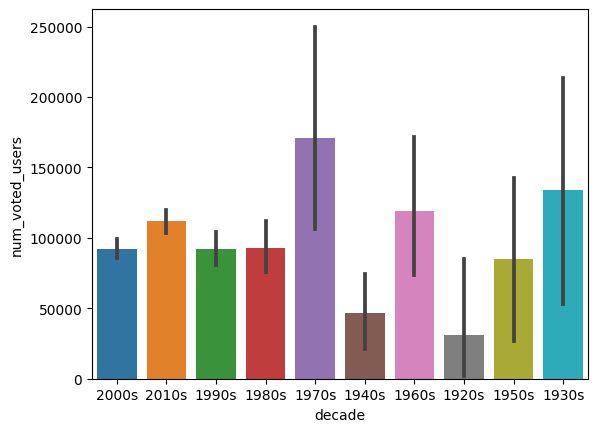

In [118]:
sns.barplot(data=movies, x="decade", y="num_voted_users")

We found that 1970 has most num_voted_users. Thus, indicating that 1970s movies performed the best with audience.

Creating a new column with decade of the movie. And new dataframes with decade having most num_user_for_reviews, most number of movie title and highest gross value.

In [112]:
movies.loc[movies['title_year'] >= 1920, 'decade'] = "1920s"
movies.loc[movies['title_year'] >= 1930, 'decade'] = "1930s"
movies.loc[movies['title_year'] >= 1940, 'decade'] = "1940s"
movies.loc[movies['title_year'] >= 1950, 'decade'] = "1950s"
movies.loc[movies['title_year'] >= 1960, 'decade'] = "1960s"
movies.loc[movies['title_year'] >= 1970, 'decade'] = "1970s"
movies.loc[movies['title_year'] >= 1980, 'decade'] = "1980s"
movies.loc[movies['title_year'] >= 1990, 'decade'] = "1990s"
movies.loc[movies['title_year'] >= 2000, 'decade'] = "2000s"
movies.loc[movies['title_year'] >= 2010, 'decade'] = "2010s"

In [113]:
df_by_decade = movies.groupby('decade')['num_user_for_reviews'].sum() 

In [114]:
df_cnt_by_decade = movies.groupby('decade')['movie_title'].count().reset_index()

In [161]:
df_cnt_by_decade = pd.DataFrame(df_cnt_by_decade)

In [164]:
movies.head()

,director_name,num_critic_for_reviews,duration,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,...,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit,top_10_directors,decade,revenue($),gross($)
0,James Cameron,723,178,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,...,PG-13,237000000,2009,8,33000,523505847,NaN,2000s,$523.51MM,$760.51MM
1,Gore Verbinski,302,169,40000,309404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,...,PG-13,300000000,2007,7,0,9404152,NaN,2000s,$9.4MM,$309.4MM
2,Sam Mendes,602,148,11000,200074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,...,PG-13,245000000,2015,7,85000,-44925825,NaN,2010s,$-44.93MM,$200.07MM
3,Christopher Nolan,813,164,27000,448130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,...,PG-13,250000000,2012,8,164000,198130642,8,2010s,$198.13MM,$448.13MM
5,Andrew Stanton,462,132,640,73058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,...,PG-13,263700000,2012,7,24000,-190641321,NaN,2010s,$-190.64MM,$73.06MM


In [206]:
df_gross_by_2000s = movies.query('1999 < title_year < 2011 ')

In [207]:
df_gross_by_2000s['title_year'].unique()

array([2009., 2007., 2010., 2006., 2008., 2005., 2004., 2003., 2001.,
       2002., 2000.])

In [208]:
df_gross_by_2000s = df_gross_by_2000s.groupby(['title_year'])['gross'].sum().reset_index() 

In [209]:
pd.options.display.float_format = '{:.0f}'.format

In [213]:
df_gross_by_2000s['gross($)'] = '$' + (df_gross_by_2000s['gross'].astype(float)/1000000).round(2).astype(str) + 'MM'

In [214]:
print(df_gross_by_2000s.to_string())

    title_year      gross    gross($)
0         2000 7042828806  $7042.83MM
1         2001 8132057890  $8132.06MM
2         2002 8701956639  $8701.96MM
3         2003 7747711729  $7747.71MM
4         2004 8144924597  $8144.92MM
5         2005 8355051776  $8355.05MM
6         2006 8475258220  $8475.26MM
7         2007 8281615299  $8281.62MM
8         2008 8959134398  $8959.13MM
9         2009 9934523261  $9934.52MM
10        2010 9931330977  $9931.33MM


In [107]:
px.line(df_cnt_by_decade, x="decade",y='movie_title',template='plotly_dark',
        title="No of releases per decade")

We can identify that decade 2000s has most number of movies. Let's see the individual gross revenue.

In [215]:
px.line(df_gross_by_2000s, x='title_year',y='gross($)',template='plotly_dark',text='gross',
        title="Gross revenue in 2000s")

Let's analyse the year 2010 in the newt graph.

In [119]:
movies['revenue($)'] = '$' + (movies['profit'].astype(float)/1000000).round(2).astype(str) + 'MM'

In [120]:
movies['gross($)'] = '$' + (movies['gross'].astype(float)/1000000).round(2).astype(str) + 'MM'

In [121]:
movies["revenue($)"].head()

0     $523.51MM
1        $9.4MM
2     $-44.93MM
3     $198.13MM
5    $-190.64MM
Name: revenue($), dtype: object

In [216]:
px.scatter(movies,x='gross',y='num_user_for_reviews',size='num_user_for_reviews', 
           color = 'imdb_score',hover_name='movie_title',animation_frame='title_year',
           title="Distribution of Gross Revenue and Votes")

We can identify that Inception is the most voted movie with high imdb score and all high gross revenue in 2010.

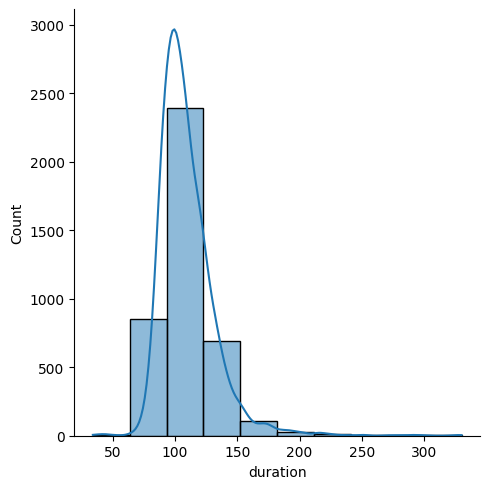

In [166]:

sns.displot(movies['duration'],bins=10,kde=True)


Most of Movies Belongs to Runtime Range - 90 to 130 Minutes 

In [122]:
df_actors_by_audience = movies.sort_values(by="num_user_for_reviews",ascending = False).iloc[:10,:] 

In [123]:
df_actors_by_audience.head()

,director_name,num_critic_for_reviews,duration,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,...,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit,top_10_directors,decade,revenue($),gross($)
270,Peter Jackson,297.00,171.00,16000.00,313837577.00,Action|Adventure|Drama|Fantasy,Christopher Lee,The Lord of the Rings: The Fellowship of the R...,1238746,22342,...,PG-13,93000000.00,2001.00,8.80,21000,220837577.00,5.00,2000s,$220.84MM,$313.84MM
66,Christopher Nolan,645.00,152.00,23000.00,533316061.00,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,...,PG-13,185000000.00,2008.00,9.00,37000,348316061.00,3.00,2000s,$348.32MM,$533.32MM
1937,Frank Darabont,199.00,142.00,11000.00,28341469.00,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,13495,...,R,25000000.00,1994.00,9.30,108000,3341469.00,1.00,1990s,$3.34MM,$28.34MM
654,Lana Wachowski,313.00,136.00,18000.00,171383253.00,Action|Sci-Fi,Keanu Reeves,The Matrix,1217752,18563,...,R,63000000.00,1999.00,8.70,25000,108383253.00,6.00,1990s,$108.38MM,$171.38MM
240,George Lucas,320.00,136.00,20000.00,474544677.00,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,37723,...,PG,115000000.00,1999.00,6.50,13000,359544677.00,NaN,1990s,$359.54MM,$474.54MM


In [124]:
px.bar(df_actors_by_audience,x='actor_1_name',y='gross',color='num_user_for_reviews',
       hover_name='movie_title', text='imdb_score',template='plotly_dark')

Natalie Portman has highest number of top 10 movies according to userreviews. 


Also, a intresting point to observe from above plot -> Movie - The Shawshank Redemption got the Highest Rating of 9.3 and high user reviews but still below average Revenue generated by Movie compared to other Movies and actors!

In [125]:
df_actors_by_critic = movies.sort_values(by="num_critic_for_reviews",ascending = False).iloc[:10,:] 

In [126]:
px.bar(df_actors_by_critic,x='actor_1_name',y='gross',color='num_critic_for_reviews',
       hover_name='movie_title', text='imdb_score',template='plotly_dark')

A intresting point to observe from above plot -> Movie - Interstellar got the Highest Rating of 8.6 and still below average Revenue generated by Movie compare to other Movies and actors!